Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Lauren Hawley"
COLLABORATORS = ""

---

# Project 3: Kiva Lenders and Loans

> Be sure to include code documentation (docstrings, inline comments) for all Python code you provde.

Access to loans is a huge problem for many people in the world. To combat this problem, Kiva, an international nonprofit, connects people with lenders in an attempt to alleviate poverty. There are over 2.5 million borrowers in 84 countries involved with Kiva. With a 97.1 repayment rate, the 1.6 million lenders have lent over 1 billion dollars. As Kiva is a nonprofit, it has developers worldwide and has shared its data. The Kiva API (application programming interface, a concept we will cover later in this course) has many files and formats containing the information of loans, partners, temas, and more. For the purpose of this project, we will focus on the xml files. The xml files, containing data from June 27, 2017, are included in the `data` directory associated with this project. 

## Project Logistics

This project is targeted at individuals, but I will allow self-selected two person groups.  If using a two person group, I expect both students to be equally able to do (and explain) any of the project parts.  Also, in addition to the two questions and accompanying visualizations specified by your teaching staff, I expect either one additional question/visualization of significant complexity, or two questions/visualizations of moderate complexity.  You may also increase the complexity of a self-defined visualization by using interactive dashboard features of Tableau.

### Grading

There are four aspects of this project:

1. Exploration using Python and XPath
2. Assembling data into `pandas` dataframes
3. Exporting data to SQL tables
4. Questions and Visualization

The first three are demonstrated primarily through Python, will be graded out of 15 points per aspect, and grading will be both for correctness and for good clear functions, docstrings, and inline comments.  You will **not** need a narrative surrounding these first three aspects.

The last aspect will also be graded out of 15 points, and will have greater similarity to the grading of previous projects, with an expectation of a visualization that clearly answers a question and the narrative to put it in context and interpret/explain the results.

## Understand the context

Explore the Kiva site.  In the two cells that follow, write about what you have learned.  These answers will be graded for their clarity, coherence, and quality of writing (paragraph structure/composition, grammar, spelling, etc.). 

For the first one, imagine that you have some money and want to participate as a new lender.  Figure out the process by which you would do this and how you could direct and/or control how your money could be used.

   To be a lender for Kiva you would check Kiva for opportunities and select one you wish to loan money to. Then you crowdfund the loan in increments of $25 or more. Once you complete the fundraising the borrower will eventually repay the loan and lenders can then use repayments to fund new loans, donate or withdraw their money. Once you select a borrower to lend to and raise the money needed Kiva takes care of the rest by using due diligence and monitoring processes. While Kiva does not guarantee repayment on any loans they do a great job of educating lenders about the risks. If the borrower does repay the money then the lender is allowed to do whatever they want with it.  

Now imagine that you are a borrower.  In particular, imagine yourself in a disadvantaged locale and/or situation and explore how you would seek funding and specify what you need and what you might do to convince lenders to help crowdsource your funding.

First you must apply for a loan and Kiva loans are facilitated through two models, partner and direct. For partner laons, borrowers apply to a local Field Partner, which manages the loan on the ground. For direct loans, borrowers apply through the Kiva website. After applying for a loan, it must go throuhg an underwriting and approval process. Partner loans are facilitated by local nonproficts or lending institutions with will approve the request. Kiva monitors each Field Partner to ensure that the requests are legitimate. Direct loans are approved through "social underwriting," where trustworthiness is determined by friends and family lending a portion of the loan request, or by a Kiva approved Trustee vouching for the borrower.  

## Part 1A: Exploring Partners

The file `data/partners.xml` contains information from a pre-assembled snapshot of the field partners (organizations associated with Kiva that group together individual lenders).  Open the file in a text editor and, using the tag names and your intuition, generate a subset list (of size perhaps 6) of the kinds of information maintained about each partner that you find most interesting.

-The rating of each partner
-The total amount raised
-The currency exchange loss rate
-The loans posted
-The country name 
-The discription of the social preformance strength 

In the following series of cells, we give an English-level information request, and your job is to construct an XML XPath query to provide the answer, demonstrating it on the the xml parner tree/root named `ptree` and `proot`, respectively, and using `print` to output the answer(s) in a clear and readable fashion.  Do as much as you can with the XPath, and rely on subsequent Python programming as little as possible.

**Q2a** How many partners are specified in the xml?

In [2]:
from lxml import etree
stripparser = etree.XMLParser(remove_blank_text=True)

ptree = etree.parse('data/partners.xml', stripparser)
proot = ptree.getroot() #parsing the xml file and getting the root

nodeset = proot.xpath("//partner") #using xpath to get the nodes where partner appears
partners = [] 
for node in nodeset:
    partners.append(node.text) 
print(len(partners)) #The number of partners in this data set

79


**Q2b** List the *names* of the partners with a rating greater than 4.

In [3]:
#This question through question 3a all use an xpath querey to get what 
#is being asked
nodeset = proot.xpath("//partner[rating > 4]/name") 
partners2 = []
for node in nodeset:
    partners2.append(node.text)
print(partners2)

['VisionFund Cambodia', 'KREDIT Microfinance Institution', 'Hattha Kaksekar Limited (HKL)', 'Fundación Paraguaya', 'BRAC Uganda']


**Q2c** Among all partners, what is the maximum *total amount raised*?  What is the minimum *total amount raised*?  Be sure and convert strings to numbers before determining your answer.

In [4]:
nodeset = proot.xpath("//partner/total_amount_raised")
totalamount = []
for node in nodeset:
    totalamount.append(int(node.text)) #converting strings to integers as they are added to the list
print(max(totalamount))
print(min(totalamount))

47800450
65750


**Q2d** In similar fashion, determine the maximum and minimum total amount raised, but amongst the partners with rating >= 4.

In [5]:
nodeset = proot.xpath("//partner[rating>=4]/total_amount_raised")
totalamount2 = []
for node in nodeset:
    totalamount2.append(int(node.text)) #converting strings to integers as they are added to the list
print(max(totalamount2))
print(min(totalamount2))

47800450
3059400


**Q2e** Compile a list of tuples containing the `iso_code` and `name` of all the countries represented amongst all the Kiva partners.  Print the number of tuples in the list and the values of the first 10 tuples in the list.

In [6]:
nodeset = proot.xpath("//country/iso_code")
nodeset2 = proot.xpath("//country/name")
iso = []
name2 = []
for node in nodeset:
    iso.append(node.text)
for node in nodeset2:
    name2.append(node.text)
countries = list(zip(iso, name2)) #takes item from first list and second list, creates a tuple of them
#and then creates a new list out of the tuples
print(len(countries))
print(countries[:10]) #the first 10 tuples of the list    

84
[('ML', 'Mali'), ('SV', 'El Salvador'), ('PE', 'Peru'), ('MW', 'Malawi'), ('BO', 'Bolivia'), ('KH', 'Cambodia'), ('PS', 'Palestine'), ('IL', 'Israel'), ('LS', 'Lesotho'), ('ZA', 'South Africa')]


**Q2f** Create lists of delinquincy rates and default rates (as floating point numbers) for all the partners, printing the first five of each.

In [7]:
nodeset = proot.xpath("//delinquency_rate")
nodeset2 = proot.xpath("//default_rate")
delinq = []
default = []
for node in nodeset:
    delinq.append(float(node.text))
for node in nodeset2:
    default.append(float(node.text))
print(delinq[:5])
print(default[:5])

[1.1125364387655, 2.4834444054298, 0.0, 0.14391277548997, 1.5682302815172]
[0.54829206321864, 1.1828803179341, 0.0, 0.0, 1.6012453761993]


**Q3a** Build a pandas dataframe with the four columns of partner id, partner name, delinquincy rate, and default rate.  Be sure and set the index to the id and name.  Then use the `.describe()` method on the resultant dataframe to observe a print of the basic statistical information about the two numeric columns.

In [8]:
import pandas as pd

nodeset = proot.xpath("//partner/id")
ID = []
for node in nodeset:
    ID.append(node.text)
nodeset2 = proot.xpath("//partner/name")
name = []
for node in nodeset2:
    name.append(node.text)

#creating a pandas dataframe 
df = pd.DataFrame({"partnerID":ID, "partnerName":name, "DelinquencyRate":delinq, "DefaultRate":default}, index = ID and name)
df.describe()

,DefaultRate,DelinquencyRate
count,79.000000,79.000000
mean,0.984512,5.494922
std,1.716426,10.164003
min,0.000000,0.000000
25%,0.028471,0.507842
50%,0.242661,1.605414
75%,0.797939,5.200973
max,7.741658,55.716721


**Q3b** The problem with summary statistics is that we sometimes fail to get a sense of the actual distribution of the data.  A visualization of the data through a scatter plot or histogram can often go a long way to conveying whether data follows some kind of normal distribution or has one or a few modes and/or a tail.

While we did not explore the ability of `pandas` to use `matplotlib` earlier in the term, it can be a much quicker way to get a visualization than exporting and then using a tool like `Tableau`.

We still need to use the `matplotlib` paradigm of:

`import matplotlib.pyplot as plt`, then generate some graphics, and then `plt.show()` to get the visualization to appear.  Do this in the cell that follows with the goal of displaying histograms for the two numeric columns of default-rate and delinquincy-rate.  You may have to explore through StackOverflow or the `pandas` documentation how to tell `pandas` to create a historgram.  In the Markdown cell that follows the code cell, interpret your visualization.

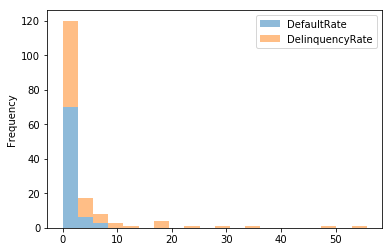

In [9]:
import matplotlib.pyplot as plt

plt.figure();
df.plot.hist(alpha = .5, stacked = True, bins = 20) #plotting dataframe as histogram 
plt.show()

The default rate is more concentrated while the delinquency rate has more variance. The delinquency rates tend to be higher than the default rates. Both rates however, have numerous values between 0 and 5. Both distributions are skewed to the right. 

**Q4** Kiva is, in a large part, successful due to their ability to connect regional lenders to borrowers. That means that, given a region (perhaps from whence a borrower has applied), we wish to find the one or more partners from that region.  Start by defining a function that, given a parameter of a `partners.xml` **tree root**, builds and returns a dictionary whose keys are the regions represented and whose values is a list of partner ids for the partners who include that region.
```
findRegions(rootnode)
```
At the end of the solution code cell, call the function and, using the returned dictionary, print the name of the region and the length of the list of partners represented in the region for each region.

In [10]:
def findRegions(rootnode):
    """
    Given a region, finds one or more partners from that region and gives a dictionary with the information.
    Parameters:
        rootnode: the root node from a xml tree
    Return Value: A dictionary with the region and a list of partner ids from that region
    """
    D = {}
    nodeset = rootnode.xpath("//region/text()")
    for region in nodeset:
        D[region] = rootnode.xpath("//region[text()='"+ region + "']/../../../id/text()")
    return D     
regionD = findRegions(proot)
for region, partners in regionD.items():
    print("Region:", region, "Num partners:", len(partners))

Region: Africa Num partners: 26
Region: Central America Num partners: 7
Region: South America Num partners: 12
Region: Asia Num partners: 17
Region: Middle East Num partners: 5
Region: Oceania Num partners: 3
Region: North America Num partners: 6
Region: Eastern Europe Num partners: 3


## Part 1B: Exploring Loans

Kiva has many more loans than partners, and so requests for XML data on loans is split into multiple requests to the server and results in multiple XML files returned.  In the `data` directory, we have stored the result of 10 such requests in the `loanSearch1.xml` through `loanSearch10.xml`.  We will do a few XPath queries to the first of these in order to help understand the structure of the data.  But in **Part 2** our goal is to build `pandas` dataframes for all the data, and your processing will have to iterate over all 10 files to compose the resultant `loan` dataframe.

**Q5** How many individual loans are in `data/loanSearch1.xml`?

In [11]:
from lxml import etree
stripparser = etree.XMLParser(remove_blank_text=True)

ltree = etree.parse('data/loanSearch1.xml', stripparser)
lroot = ltree.getroot() #again parsing, for new loan file this time though

nodeset = lroot.xpath("//loan")
loan = []
for node in nodeset:
    loan.append(node.text)
print(len(loan))

100


**Q6:** What are the unique values of the `status` element of a `loan`?  Use xpath and build a dictionary to count the frequency of each and print the dictionary at the end.

In [12]:
nodeset = lroot.xpath("//loan/status")
status = []
for node in nodeset:
    status.append(node.text)

d={} #creating a dictionary to count the frequency
for i in status: 
    if i in d: #checks if item is in the dictionary already 
        d[i] += 1 #if it is, add one to the frequency
    else: 
        d[i] = 1 #if it isn't then set the frequency to one
print(d)

{'fundraising': 68, 'funded': 32}


**Q7** How many unique partners (through partner_id) are associated with the set of loans in this first file?

In [13]:
nodeset = lroot.xpath("//loan/partner_id")
unique = []
for node in nodeset:
    unique.append(node.text)
myset = set(unique)  #makes sure values are unique 
unique2 = list(myset) #creates a list out of it
print(len(unique2))

19


**Q8** Similarly, how many unique country_code's are associated with the set of loans in this first file?

In [14]:
nodeset = lroot.xpath("//location/country_code")
cc = []
for node in nodeset:
    cc.append(node.text)
myset2 = set(cc)
cc2 = list(myset2)
print(len(cc2))

16


## Part 2: Constructing a Sound Set of Tables

Our goal in this section is to create a **sound** set of pandas dataframe tables based on the xml data.  These tables will then be used to create and insert the data into our MySQL database.

Since we have created pandas dataframes both from lists of lists and from a dictionary of columns, I don't want to prescribe which method you use.  But you should define helper functions and use them as you build the tables.  Also remember that you need to repeat the generation of loan data multiple times, once for each of the 10 loan files.

The loans data is already nice, in that it does not require a decomposition into smaller tables.  The partner data, however, has multiple country locations associated with many of the partners.  To make this sound from a relational database standpoint, we need to have tables: `partners`, `locations`, and a linkage table allowing the many-to-many relationship, which we will call `partner_location`.

To help, we specify the four tables to be generated:

```
partners:
  id: int (PK/index)
  name: str
  status: str
  rating: float (Note that some entries have 'Not Rated')
  delinquincy_rate: float
  default_rate: float
  total_amount_raised: int
  loans_posted: int
  
locations:
  iso_code: str (2-char PK/index)
  name: str
  region: str

partner_location:
  partner_id: int (PK/index)
  iso_code: str (PK/index)

loans:
  id: int (PK/index)
  name: str
  status: str
  activity: str
  sector: str
  country_code: str
  partner_id: int
  loan_amount: number

```

Note that you must do conversions between the strings we obtain from XML Xpath queries into fields that are integers or floats.

**Q1** Generate the `pandas` dataframe for the `partners` data, using good documentation and good functional abstraction and decomposition.  Once created, use `head(10)` to display the first 10 rows.

In [15]:
Status = []
nodeset1 = proot.xpath("//partner/status")
for node in nodeset1:
    Status.append(node.text)
Rating = []
nodeset2 = proot.xpath("//partner/rating")
for node in nodeset2:
    if node.text != 'Not Rated':
        Rating.append(float(node.text))
    else:
        Rating.append(node.text)
Posted = []
nodeset3 = proot.xpath("//partner/loans_posted")
for node in nodeset3:
    Posted.append(node.text)
#taking the lists above and creating a pandas dataframe out of them
partnersdf = pd.DataFrame({"PartnerID": [int(i) for i in ID], "name":[str(i) for i in name], "status":[str(i) for i in Status], "rating":Rating, "delinquencyRate":[float(i) for i in delinq], "defaultRate":[float(i) for i in default], "TotalAmountRaised":[int(i) for i in totalamount], "LoansPosted":[int(i) for i in Posted]}, index = ID)
partnersdf.head(10)

,LoansPosted,PartnerID,TotalAmountRaised,defaultRate,delinquencyRate,name,rating,status
438,1489,438,3510425,0.548292,1.112536,Réseau de Micro-institutions de Croissance de ...,3,active
199,18323,199,11913025,1.182880,2.483444,CrediCampo,4,active
93,6262,93,12830625,0.000000,0.000000,EDAPROSPO,3.5,active
381,880,381,1082525,0.000000,0.143913,MicroLoan Foundation (MLF) Malawi,1,active
140,2667,140,4133950,1.601245,1.568230,CIDRE,3.5,active
61,5671,61,4118325,0.015814,0.000000,MAXIMA Microfinance,3.5,active
462,559,462,793150,0.000000,0.961473,Al Ibdaa Microfinance,2.5,active
452,420,452,357750,0.000000,30.098506,African Clean Energy (ACE),1.5,active
204,16238,204,12088750,0.242661,3.048890,VisionFund Cambodia,4.5,active
411,486,411,452900,0.000000,0.414065,South Pacific Business Development (SPBD) - So...,1,active


**Q2** Generate the `pandas` dataframe for the `locations` data, using good documentation and good functional abstraction and decomposition.  Once created, use `head(10)` to display the first 10 rows.

In [16]:
Region = []
nodeset = proot.xpath("//country/region")
for node in nodeset:
    Region.append(node.text)
locationsdf = pd.DataFrame({"IsoCode":[str(i) for i in iso], "Name":[str(i) for i in name2], "Region":[str(i) for i in Region]}, index = iso)
locationsdf.head(10)


,IsoCode,Name,Region
ML,ML,Mali,Africa
SV,SV,El Salvador,Central America
PE,PE,Peru,South America
MW,MW,Malawi,Africa
BO,BO,Bolivia,South America
KH,KH,Cambodia,Asia
PS,PS,Palestine,Middle East
IL,IL,Israel,Middle East
LS,LS,Lesotho,Africa
ZA,ZA,South Africa,Africa


**Q3** Generate the `pandas` dataframe for the `partner_location` data, using good documentation and good functional abstraction and decomposition.  Once created, use `head(10)` to display the first 10 rows.

In [17]:
D2 = {}
nodeset = proot.xpath("//country/iso_code/text()")
for location in nodeset:
    D2[location] = [int(i) for i in proot.xpath("//iso_code[text()='"+ location + "']/../../../id/text()")]
print(D2)

#do this so that multiple iso codes can be linked to a single partner
PartnerID = []
IsoCode = []
for key in D2:
    for item in D2[key]:
        IsoCode.append(key)
        PartnerID.append(item)

pl = pd.DataFrame({"PartnerID":[int(i) for i in PartnerID], "IsoCode":[str(i) for i in IsoCode]}, index = PartnerID and IsoCode)
pl.head(10)

{'ML': [438], 'SV': [199, 167], 'PE': [93, 119, 484, 435], 'MW': [381], 'BO': [140, 48], 'KH': [61, 204, 9, 106, 311], 'PS': [462, 80], 'IL': [462], 'LS': [452], 'ZA': [452], 'TH': [204, 106], 'SB': [411], 'PK': [247, 245], 'HT': [380, 442], 'XK': [240], 'TJ': [100, 63], 'GH': [392, 384], 'MZ': [23], 'CD': [402], 'HN': [118, 201], 'PH': [145, 144, 136, 125, 126], 'SL': [183, 148], 'CO': [154, 465, 177], 'KE': [133, 386, 138, 164, 156], 'AL': [239], 'JO': [185, 80], 'NI': [176, 295, 120], 'UG': [222, 163, 329, 65], 'MX': [357, 294, 275], 'TG': [296], 'RW': [117, 161], 'SN': [108], 'AM': [146], 'WS': [15], 'EC': [188, 137], 'MM': [416], 'PY': [58], 'TR': [198], 'CM': [217], 'ID': [406], 'VN': [394], 'YE': [205], 'US': [395], 'TZ': [87], 'TL': [243], 'MG': [443, 359]}


,IsoCode,PartnerID
ML,ML,438
SV,SV,199
SV,SV,167
PE,PE,93
PE,PE,119
PE,PE,484
PE,PE,435
MW,MW,381
BO,BO,140
BO,BO,48


**Q4** Generate the `pandas` dataframe for the `loans` data, using good functional abstraction and documentation.

In [18]:
def loans(filenumber):
    """Gets the rode node from each of the loan files
    Parameters:
        filenumber: a number that designates which loan file to use
    Return Value: the root of the file as an element
    """
    loantree = etree.parse('data/loanSearch' + str(filenumber) + '.xml', stripparser)
    loanroot = loantree.getroot()
    return(loanroot)
#creates a list of all the loan roots from each of the 10 loan files
L = []
for i in range(1,11):
    L.append(loans(i))
#for each of the columns we need use nested for loops to go through the 10 roots
#and get a list of values that we need for each column
LoanID = []
for root in L:
    nodeset = root.xpath("//loan/id")
    for node in nodeset:
        LoanID.append(node.text)
LoanName = []
for root in L:
    nodeset = root.xpath("//loan/name")
    for node in nodeset:
        LoanName.append(node.text)
LoanStatus = []
for root in L:
    nodeset = root.xpath("//loan/status")
    for node in nodeset:
        LoanStatus.append(node.text)
LoanActivity =[]
for root in L:
    nodeset = root.xpath("//loan/activity")
    for node in nodeset:
        LoanActivity.append(node.text)
LoanSector = []
for root in L:
    nodeset = root.xpath("//loan/sector")
    for node in nodeset:
        LoanSector.append(node.text)
LoanCC = []
for root in L:
    nodeset = root.xpath("//loan/location/country_code")
    for node in nodeset:
        LoanCC.append(node.text)
LoanPartID = []
for root in L:
    nodeset = root.xpath("//loan/partner_id")
    for node in nodeset:
        LoanPartID.append(node.text)
LoanAmount = []
for root in L:
    nodeset = root.xpath("//loan/loan_amount")
    for node in nodeset:
        LoanAmount.append(node.text)
        
Loans = pd.DataFrame({"LoanID":[int(i) for i in LoanID], "Name":LoanName, "Status":LoanStatus, "Activity":LoanActivity, "Sector":LoanSector, "CountryCode":LoanCC, "PartnerID":[int(i) for i in LoanPartID], "LoanAmount":[int(i) for i in LoanAmount]}, index = LoanID) 
Loans.head(10)

,Activity,CountryCode,LoanAmount,LoanID,Name,PartnerID,Sector,Status
1322317,Fuel/Firewood,PK,500,1322317,Maqsoodan,247,Retail,fundraising
1317131,Retail,ML,5900,1317131,Djigui-Tougou Group,438,Retail,fundraising
1315977,Farming,KH,500,1315977,Nay,204,Agriculture,fundraising
1321513,Retail,SL,550,1321513,Park Light Group,148,Retail,fundraising
1322318,General Store,PH,625,1322318,Susan,145,Retail,funded
1317130,Pigs,MG,125,1317130,Marie Aurélie,359,Agriculture,fundraising
1321794,Personal Products Sales,CO,175,1321794,Elmer De Jesus,177,Retail,fundraising
1322316,Pigs,PH,150,1322316,Teodora,145,Agriculture,funded
1327214,Perfumes,PY,3050,1327214,Triunfadoras Group,58,Retail,fundraising
1321412,Florist,MM,925,1321412,Pauk Pin – 5 Group,416,Retail,fundraising


### Analysis in Pandas

Using your created pandas dataframes, answer the following questions, giving code in the following code cell, and textual answers in the markdown cell that follows that.

**Question 1:** What are the 5 countries that get the largest mean loan amount? Does your answer make sense?

In [19]:
LoansBy = Loans.groupby(by = "CountryCode")
LoansBy = LoansBy["LoanAmount"].mean()
LoansBy.nlargest(5)

CountryCode
US    9950.000000
RW    4261.029412
PY    3366.666667
ML    3021.428571
BO    2645.000000
Name: LoanAmount, dtype: float64

United States, Rwanda, Paraguay, Mali, and Bolivia are the countries with the largest mean loan amount. This makes sense becuase there's the united states and then several impoverished countries in Africa as well.  

**Question 2: **What are the top 5 average loan amounts in countries that get more than 50 loans? Does this make more sense than what you saw initially? **Hint:** It may be helpful to use the .agg() method here. For help on the syntax for this method, use the help function.

In [20]:
Loan2 = Loans.groupby("CountryCode")
Loan2D = Loan2["LoanAmount"].describe()
count = Loan2D['count']
LC = count > 50
Loan2D[LC]

,count,mean,std,min,25%,50%,75%,max
CountryCode,,,,,,,,
KE,129.0,398.643411,254.822818,50.0,200.00,300.0,500.0,1475.0
PH,277.0,323.736462,181.312723,50.0,225.00,300.0,400.0,1025.0
SV,62.0,622.983871,357.366804,200.0,306.25,550.0,800.0,1600.0
UG,61.0,736.065574,682.283613,100.0,275.00,525.0,1125.0,3075.0
WS,55.0,842.727273,536.787269,400.0,600.00,600.0,1075.0,3925.0


Kenya, Philippines, El Salvador, Uganda, and Samoa are the top 5 countries for this querey. This makes even more sense because they are often some of the countries that come to mind when we think of countries in need. It makes sense that these would be the countries getting more loans even if they are in smaller amounts. 

**Question 3:** Create a pandas dataframe that contains the following columns: Name of partner, number of loans posted in our sample (so you need to combine loans and partners in an appropriate way), sum of these loans, and average loan amount. What are the names of the top 3 partners that gives the biggest average loan and have posted more than 20 loans in our sample.

In [21]:
LoansM = pd.merge(Loans, partnersdf, how = "left", on = "PartnerID")
LoansM = LoansM[["name", "LoansPosted", "LoanAmount"]]
LoansM = LoansM[LoansM.LoansPosted > 20]
LoansM = LoansM.groupby("name").agg({"LoanAmount":["sum","mean"]})
LoansM = LoansM.sort_values(ascending = False, by = [("LoanAmount", "mean")])
LoansM[:3]

LoanAmount             
                                         sum         mean
name                                                     
Solar and Energy Loan Fund (SELF)       9950  9950.000000
Urwego Opportunity Bank               132600  5100.000000
Fundación Paraguaya                    20200  3366.666667

## Part 3: Export to SQL

To create a nice visualization, and to see the easy way we can use a MySQL to Tableau connection, put your four tables into our MySQL server.

In [22]:
from keys import keychain
from sqlalchemy import *

connectionstring = "mysql+mysqlconnector://{}:{}@hadoop2.mathsci.denison.edu/{}"
s = connectionstring.format(keychain["MySQL"]['userid'], keychain["MySQL"]['userpass'], keychain["MySQL"]['userid'])
engine = create_engine(s)
partnersdf.to_sql(name='Partners', con=engine, if_exists = 'append', index=False)

In [24]:
locationsdf.to_sql(name='Locations', con=engine, if_exists = 'append', index=False)

In [25]:
pl.to_sql(name='PartnerLocation', con=engine, if_exists = 'append', index=False)

In [26]:
Loans.to_sql(name='Loans', con=engine, if_exists = 'append', index=False)

In [27]:
#Partners.drop(engine)
#Locations.drop(engine)
#PartnerLocation.drop(engine)
#Loans.drop(engine)
print(engine.table_names())

['Loans', 'Locations', 'PartnerLocation', 'Partners', 'percipitation', 'rain']


## Part 4: Questions and Visualizations

### Question/Visualization 1

We are interested in the geographic impact of the Kiva Partners and Loans, and want to "see" what countries and regions are most heavily represented as partner lenders and as borrowers.  Using map visualization(s), and augmenting with some descriptive measures (counts of partners or borrowers), answer this question.

### Question/Visualization 2

In a more quantitative way, we want to know the sum of actual loan amounts by region and by country.  With a well constructed/annotated stacked bar graph, answer this question.

![Question 1: Geographic Impact of Kiva Partners and Loans](map.png)
This graph depicts the number of distinct partners geographically. The darker colors indicate countries with more partners while the lighter colored countries have fewer partners. As we can see in the graph, countries in South and Central America tend to have more partners as well has parts of Africa and Asia. This makes sense because the areas that are darker are the areas that we consider to be poorer or impoverished and would therefore need more loans and partners for these loans.  
![Question 2: Total Loan Amounts For Each Region and Country](bar.png)
This graph depicts the total loan amount for each region and country. As you can see in the graph Africa and Asia have the highest total loan amounts while Eastern Europe and Oceania have the two lowest totals. The countries with the highest total loan amount in Africa were Kenya, Rwanda, Uganda. The countries with the highest total loan amount in Asia were the Philippines and Cambodia.        